In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

In [119]:
# Import data

drug_data = pd.read_csv('assessment-and-data/drug.csv')
no_drug_data = pd.read_csv('assessment-and-data/no_drug.csv')


In [120]:
'''
Create Dataframes of distances, note that the respective columns of first 4 amino acids align respectively 
in pairs with second 4 amino acids
'''

#Create array such that i while refer to only the x position of the first of the pair
n = np.arange(len(drug_data.columns)/2,step = 3)

#Create empty distance dataframes
drug_distance=pd.DataFrame()
no_drug_distance=pd.DataFrame()

for i in n:
    
    #Find x,y,z values of distance vector between pair
    x = drug_data[drug_data.columns[int(i)]] - drug_data[drug_data.columns[int(i)+12]]
    y = drug_data[drug_data.columns[int(i)+1]] - drug_data[drug_data.columns[int(i)+13]]
    z = drug_data[drug_data.columns[int(i)+2]] - drug_data[drug_data.columns[int(i)+14]]
    distance_vector = np.array([x,y,z]).T
    
    #Find magnitude of distance and add to dedicated distance dataframe
    distance = np.linalg.norm(distance_vector, axis=-1)
    drug_distance[drug_data.columns[int(i)][:4] + '_' + drug_data.columns[int(i)+12][:4]] = distance

for i in n:
    
    #Find x,y,z values of distance vector between pair
    x = no_drug_data[no_drug_data.columns[int(i)]] -no_drug_data[no_drug_data.columns[int(i)+12]]
    y = no_drug_data[no_drug_data.columns[int(i)+1]] - no_drug_data[no_drug_data.columns[int(i)+13]]
    z = no_drug_data[no_drug_data.columns[int(i)+2]] - no_drug_data[no_drug_data.columns[int(i)+14]]
    distance_vector = np.array([x,y,z]).T
    
    #Find magnitude of distance and add to dedicated distance dataframe
    distance = np.linalg.norm(distance_vector, axis=-1)
    no_drug_distance[no_drug_data.columns[int(i)][:4] + '_' + no_drug_data.columns[int(i)+12][:4]] = distance

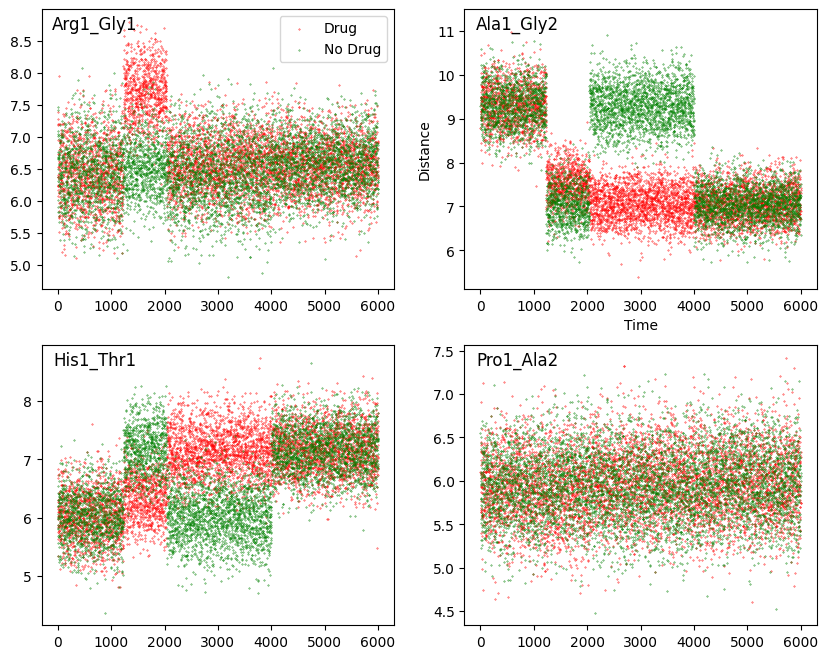

In [309]:
#Plot distance versus time results

fig, ax = plt.subplots(2,2)
d = 0

for n in range(2):
    for i in range(2):
        ax[n,i].scatter(drug_distance.index, drug_distance[drug_distance.columns[int(d)]], s = 0.1, c ='red', label = 'Drug')
        ax[n,i].scatter(no_drug_distance.index, no_drug_distance[no_drug_distance.columns[int(d)]], s = 0.1, c ='green', label = 'No Drug')
        ax[n,i].set_title(drug_distance.columns[int(d)], y = 0.9, x = 0.15)

        d+=1
ax[0,0].legend()
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Distance')

fig.set_figheight(8)
fig.set_figwidth(10)

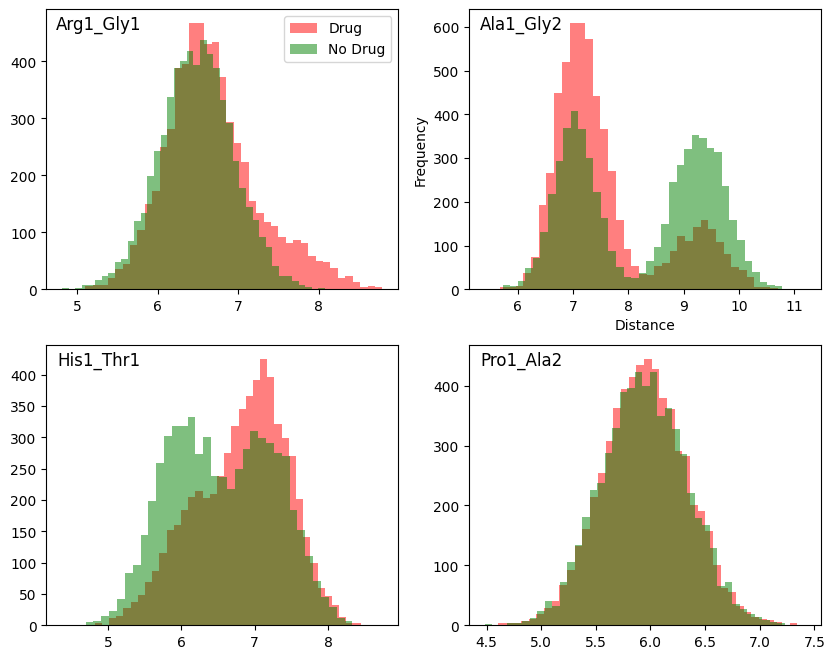

In [310]:
#Plot histogram results

fig, ax = plt.subplots(2,2)
d = 0

for n in range(2):
    for i in range(2):
        ax[n,i].hist(drug_distance[drug_distance.columns[int(d)]], bins = 40, alpha = 0.5, color ='red', label = 'Drug')
        ax[n,i].hist(no_drug_distance[no_drug_distance.columns[int(d)]], bins = 40, alpha = 0.5, color ='green', label = 'No Drug')
        ax[n,i].set_title(drug_distance.columns[int(d)], y = 0.9, x = 0.15)

        d+=1
ax[0,0].legend()
ax[0,1].set_xlabel('Distance')
ax[0,1].set_ylabel('Frequency')

fig.set_figheight(8)
fig.set_figwidth(10)

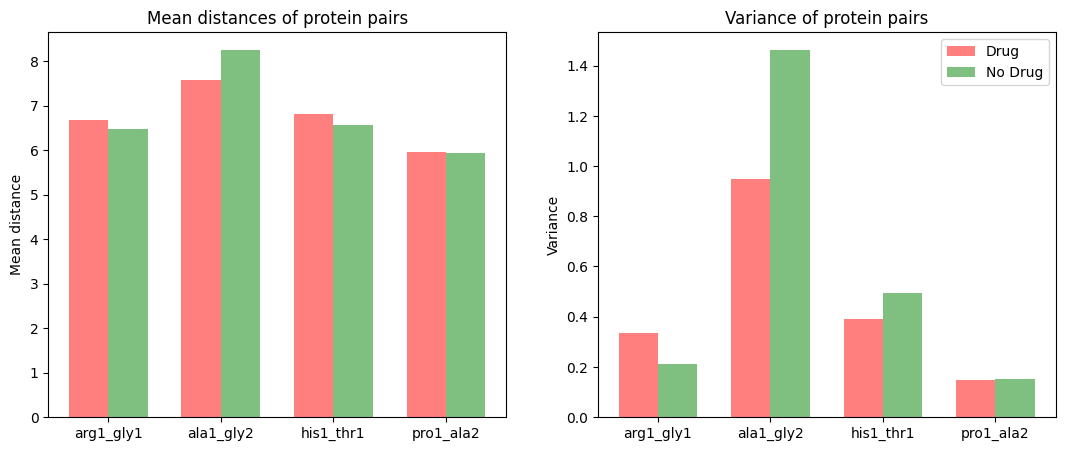

In [576]:
#Plot bar chart for mean distances and variances

labels = ['arg1_gly1', 'ala1_gly2', 'his1_thr1', 'pro1_ala2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1,ax2)  = plt.subplots(1,2,figsize = (13,5))

# Plot bars themselves
mean_rects1 = ax1.bar(x - width / 2, drug_distance.mean(), width,label = 'Drug', color = 'red', alpha = 0.5)
mean_rects2 = ax1.bar(x + width / 2, no_drug_distance.mean(), width, label='No Drug', color = 'green', alpha = 0.5)

var_rects1 = ax2.bar(x - width / 2, drug_distance.var(), width,label = 'Drug', color = 'red', alpha = 0.5)
var_rects2 = ax2.bar(x + width / 2, no_drug_distance.var(), width, label='No Drug', color = 'green', alpha = 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Mean distance')
ax1.set_title('Mean distances of protein pairs')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax2.set_ylabel('Variance')
ax2.set_title('Variance of protein pairs')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

plt.show()

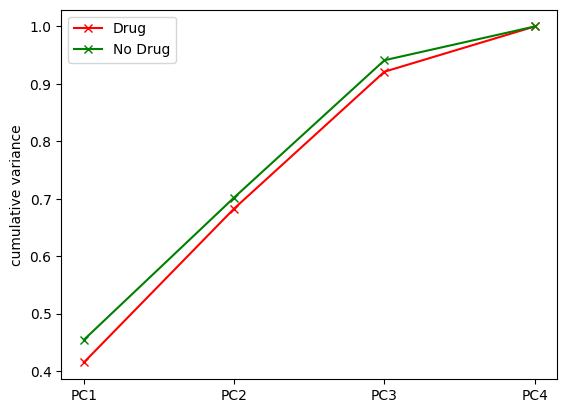

In [578]:
#Set up PCA analysis

pca_drug = PCA(n_components = 4)
drug_scaled = scale(drug_distance)
pca_drug.fit(drug_scaled)

pca_no_drug = PCA(n_components = 4)
no_drug_scaled = scale(no_drug_distance)
pca_no_drug.fit(no_drug_scaled)

#plot cumulative ratios
fig, ax = plt.subplots()

ax.plot(np.cumsum(pca_drug.explained_variance_ratio_),c = 'red', marker = 'x', label = 'Drug')
ax.plot(np.cumsum(pca_no_drug.explained_variance_ratio_), c = 'green', marker = 'x', label = 'No Drug')
plt.legend()
ax.set_ylabel('cumulative variance')
ax.set_xticks(np.arange(4), labels = ['PC1','PC2','PC3','PC4'])

plt.show()

In [158]:
#Set up transformed PCA matrices

drug_transformed = pca_drug.fit_transform(drug_scaled)
no_drug_transformed = pca_no_drug.fit_transform(no_drug_scaled)

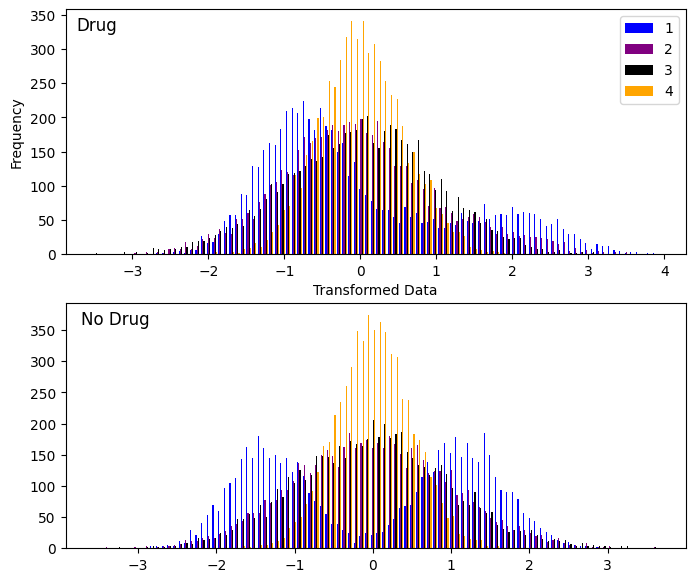

In [509]:
#Histogram of transformed PCA matrices

fig, ax = plt.subplots(2, figsize = (8,7))
labels = np.arange(1,5)
c = ['blue','purple','black','orange']

ax[0].hist(drug_transformed ,bins = 100, color=c, label = labels)
ax[0].set_title('Drug', y = 0.3, x = 0.05, pad = 108)
ax[0].set_xlabel('Transformed Data')
ax[0].set_ylabel('Frequency')
ax[1].hist(no_drug_transformed, bins = 100, color=c)
ax[1].set_title('No Drug', y = 0.3,x = 0.08, pad = 108)

ax[0].legend()
plt.show()

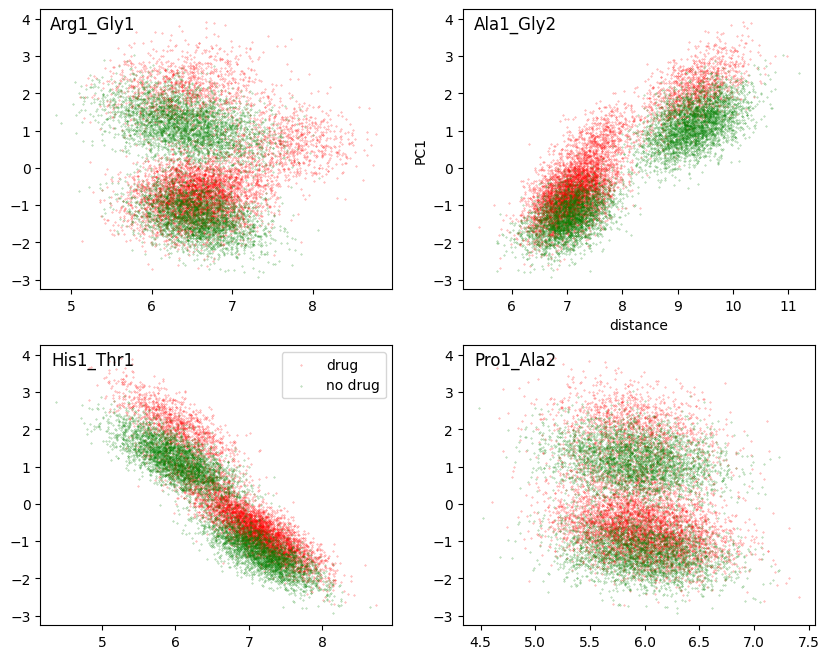

In [580]:
#Compare distances versus first principal component

fig, ax = plt.subplots(2,2, figsize = (10,8))
d = 0

for n in range(2):
    for i in range(2):
        ax[n,i].scatter(drug_distance[drug_distance.columns[int(d)]], drug_transformed[:,0], s = 0.1, alpha = 0.5, c ='red', label = 'drug')
        ax[n,i].scatter(no_drug_distance[drug_distance.columns[int(d)]], no_drug_transformed[:,0], s = 0.1, alpha = 0.5, c ='green', label = 'no drug')
        ax[n,i].set_title(drug_distance.columns[int(d)], y = 0.9, x = 0.15)
        d+=1
        
ax[1,0].legend()
ax[0,1].set_xlabel('distance')
ax[0,1].set_ylabel('PC1')

plt.show()

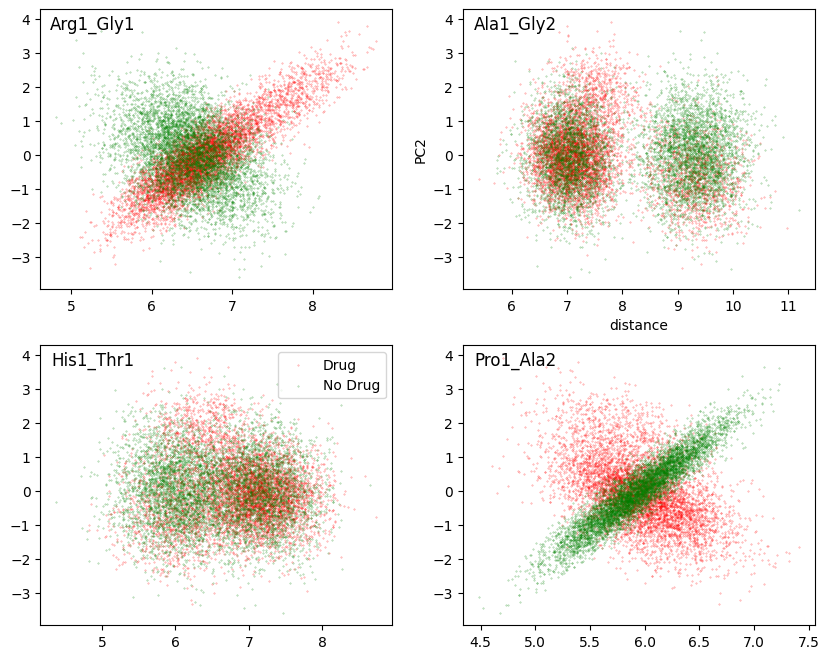

In [581]:
#Compare distances versus second principal component

fig, ax = plt.subplots(2,2, figsize = (10,8))
d = 0

for n in range(2):
    for i in range(2):
        ax[n,i].scatter(drug_distance[drug_distance.columns[int(d)]], drug_transformed[:,1], s = 0.1, alpha = 0.5, c ='red', label = 'Drug')
        ax[n,i].scatter(no_drug_distance[drug_distance.columns[int(d)]], no_drug_transformed[:,1], s = 0.1, alpha = 0.5, c ='green', label = 'No Drug')
        ax[n,i].set_title(drug_distance.columns[int(d)], y = 0.9, x = 0.15)

        d+=1
ax[1,0].legend()
ax[0,1].set_xlabel('distance')
ax[0,1].set_ylabel('PC2')

plt.show()

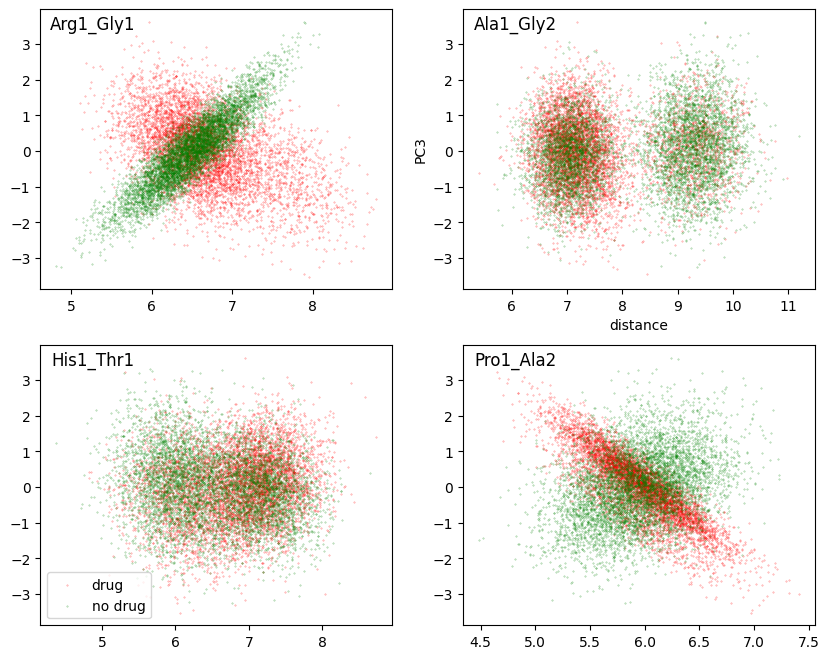

In [582]:
#Compare distances versus third principal component

fig, ax = plt.subplots(2,2, figsize = (10,8))
d = 0

for n in range(2):
    for i in range(2):
        ax[n,i].scatter(drug_distance[drug_distance.columns[int(d)]], drug_transformed[:,2], s = 0.1, alpha = 0.5, c ='red', label = 'drug')
        ax[n,i].scatter(no_drug_distance[drug_distance.columns[int(d)]], no_drug_transformed[:,2], s = 0.1, alpha = 0.5, c ='green', label = 'no drug')
        ax[n,i].set_title(drug_distance.columns[int(d)], y = 0.9, x = 0.15)
        d+=1
        
ax[1,0].legend()
ax[0,1].set_xlabel('distance')
ax[0,1].set_ylabel('PC3')

plt.show()

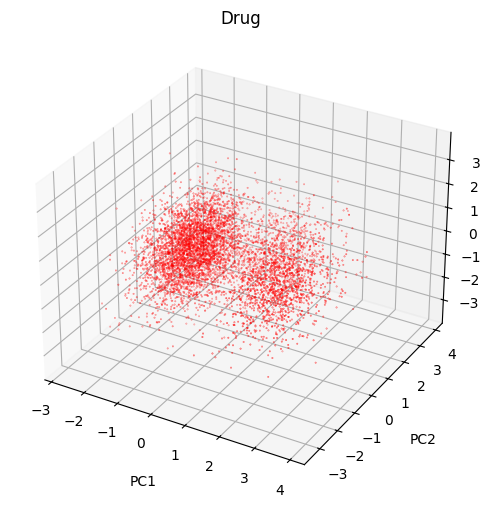

In [409]:
#Plot 3D graph with first 3 Principal Components for drug data

fig = plt.figure(figsize = (7,6))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(drug_transformed[:,0], drug_transformed[:,1], drug_transformed[:,2],s = 0.1, c = 'red')

# Set axes label
ax.set_xlabel('PC1', labelpad=10)
ax.set_ylabel('PC2', labelpad=10)
ax.set_zlabel('PC3', labelpad=10)
ax.set_title('Drug')

plt.show()

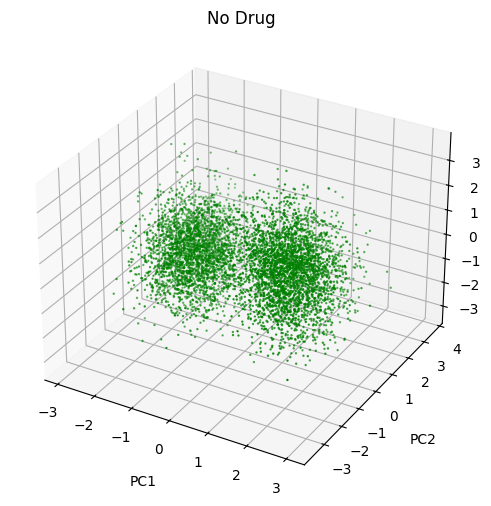

In [408]:
# Plot 3D graph with first 3 Principal Components for no drug data

fig = plt.figure(figsize = (7,6))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(no_drug_transformed[:,0], no_drug_transformed[:,1], no_drug_transformed[:,2],s = 0.5, c = 'green')

# Set axes label
ax.set_xlabel('PC1', labelpad=10)
ax.set_ylabel('PC2', labelpad=10)
ax.set_zlabel('PC3', labelpad=10)
ax.set_title('No Drug')

plt.show()

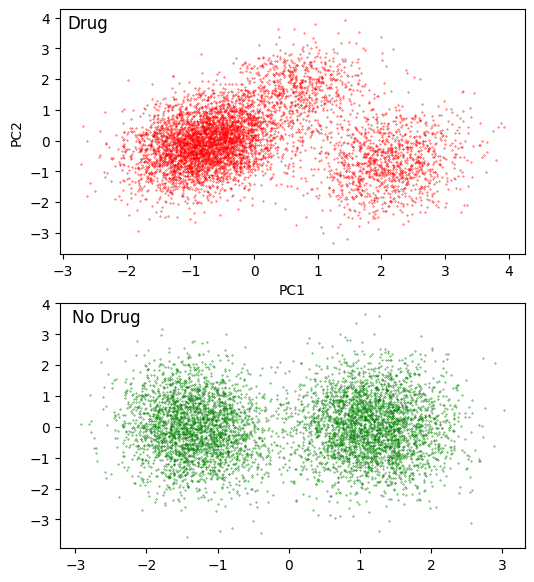

In [492]:
#Compare first versus second principal components

fig,ax = plt.subplots(2,figsize = (6,7))

ax[0].scatter(drug_transformed[:,0], drug_transformed[:,1], s = 0.1, color = 'red')
ax[1].scatter(no_drug_transformed[:,0], no_drug_transformed[:,1], s = 0.1, color = 'green')
ax[0].set_title('Drug', y=0.89, x = 0.06)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_title('No Drug', y=0.89, x = 0.1)

plt.show()

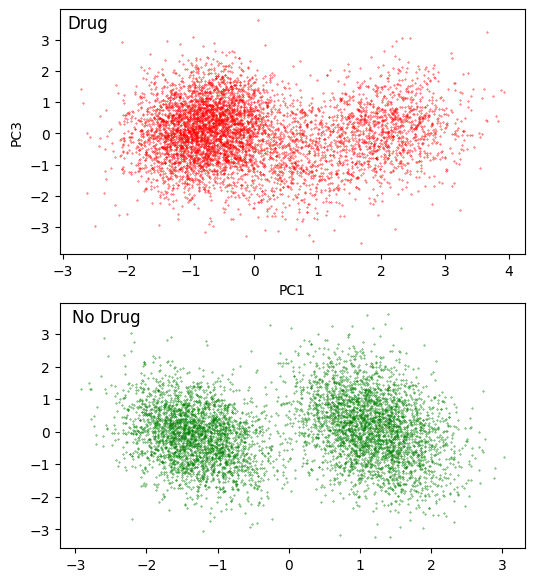

In [491]:
#Compare first versus third principal components

fig,ax = plt.subplots(2,figsize = (6,7))

ax[0].scatter(drug_transformed[:,0], drug_transformed[:,2], s = 0.1, color = 'red')
ax[1].scatter(no_drug_transformed[:,0], no_drug_transformed[:,2], s = 0.1, color = 'green')
ax[0].set_title('Drug', y=0.89, x = 0.06)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC3')
ax[1].set_title('No Drug', y=0.89, x = 0.1)

plt.show()

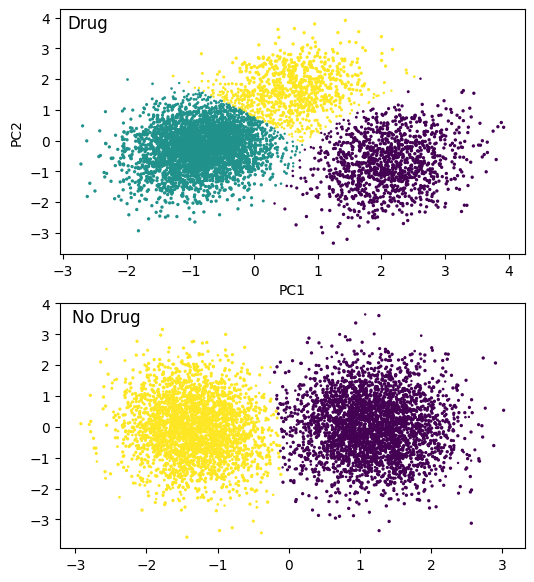

The size of the clusters in the drug model are 1213, 3839 & 948
The size of the clusters in the no drug model are 3192 & 2808


In [583]:
# Gaussian clustering of drug data for PC1 v PC2

#Reshape and set data
gaussian_drug_data = np.concatenate((drug_transformed[:,0].reshape(-1,1),drug_transformed[:,1].reshape(-1,1)),axis = 1)
gaussian_no_drug_data = np.concatenate((no_drug_transformed[:,0].reshape(-1,1),no_drug_transformed[:,1].reshape(-1,1)),axis = 1)

X_drug = gaussian_drug_data
X_no_drug = gaussian_no_drug_data

#Fit data into model, set cluster colors, and vary size by probability of point being in that cluster
gaussian_drug_pca = GaussianMixture(n_components=3).fit(X_drug)
color = gaussian_drug_pca.predict(X_drug)
probs = gaussian_drug_pca.predict_proba(X_drug)
size = 2 * probs.max(axis=1)**2

gaussian_no_drug_pca = GaussianMixture(n_components=2).fit(X_no_drug)
no_color = gaussian_no_drug_pca.predict(X_no_drug)
no_probs = gaussian_no_drug_pca.predict_proba(X_no_drug)
no_size = 2 * probs.max(axis=1) ** 2

#Plot
fig, ax = plt.subplots(2,figsize = (6,7))
ax[0].scatter(X_drug[:, 0], X_drug[:, 1], c=color, s=size)
ax[1].scatter(X_no_drug[:, 0], X_no_drug[:, 1], c=no_color, s=no_size)
ax[0].set_title('Drug', y=0.89, x = 0.06)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_title('No Drug', y=0.89, x = 0.1)
plt.show()

#Print size of clusters
print(f'The size of the clusters in the drug model are {len(color[color==0])}, {len(color[color==1])} & {len(color[color==2])}')
print(f'The size of the clusters in the no drug model are {len(no_color[no_color==0])} & {len(no_color[no_color==1])}')


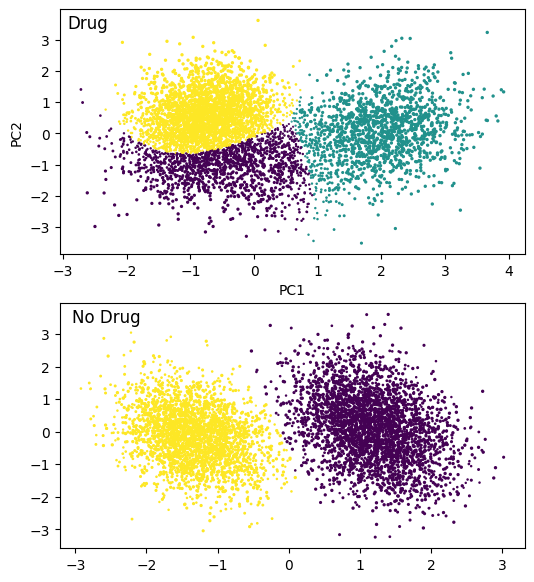

The size of the clusters in the drug model are 1522, 1555 & 2923
The size of the clusters in the no drug model are 3182 & 2818


In [584]:
# Gaussian clustering of drug data for PC1 v PC3

#Reshape and set data
gaussian_drug_data = np.concatenate((drug_transformed[:,0].reshape(-1,1),drug_transformed[:,2].reshape(-1,1)),axis = 1)
gaussian_no_drug_data = np.concatenate((no_drug_transformed[:,0].reshape(-1,1),no_drug_transformed[:,2].reshape(-1,1)),axis = 1)

X_drug = gaussian_drug_data
X_no_drug = gaussian_no_drug_data

#Fit data into model, set cluster colors, and vary size by probability of point being in that cluster
gaussian_drug_pca = GaussianMixture(n_components=3).fit(X_drug)
color = gaussian_drug_pca.predict(X_drug)
probs = gaussian_drug_pca.predict_proba(X_drug)
size = 2 * probs.max(axis=1)**2

gaussian_no_drug_pca = GaussianMixture(n_components=2).fit(X_no_drug)
no_color = gaussian_no_drug_pca.predict(X_no_drug)
no_probs = gaussian_no_drug_pca.predict_proba(X_no_drug)
no_size = 2 * probs.max(axis=1) ** 2

#Plot
fig, ax = plt.subplots(2,figsize = (6,7))
ax[0].scatter(X_drug[:, 0], X_drug[:, 1], c=color, s=size)
ax[1].scatter(X_no_drug[:, 0], X_no_drug[:, 1], c=no_color, s=no_size)
ax[0].set_title('Drug', y=0.89, x = 0.06)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_title('No Drug', y=0.89, x = 0.1)
plt.show()

#Print size of clusters
print(f'The size of the clusters in the drug model are {len(color[color==0])}, {len(color[color==1])} & {len(color[color==2])}')
print(f'The size of the clusters in the no drug model are {len(no_color[no_color==0])} & {len(no_color[no_color==1])}')


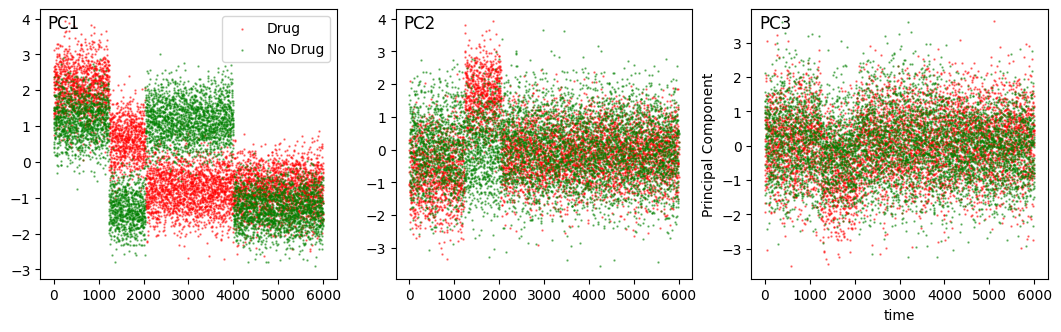

In [570]:
#Plot principal components versus time

fig, ax = plt.subplots(1,3,figsize = (13,3.5))

for i in np.arange(3):
    ax[i].scatter(np.arange(6000),drug_transformed[:,i], alpha = 0.5, s = 0.5, c = 'red', label = 'Drug')
    ax[i].scatter(np.arange(6000),no_drug_transformed[:,i], alpha = 0.5, s = 0.5, c = 'green', label = 'No Drug')
    ax[i].set_title('PC'+str(i+1), x=0.08, y =0.9)

ax[0].legend()
ax[2].set_xlabel('time')
ax[2].set_ylabel('Principal Component')

plt.show()

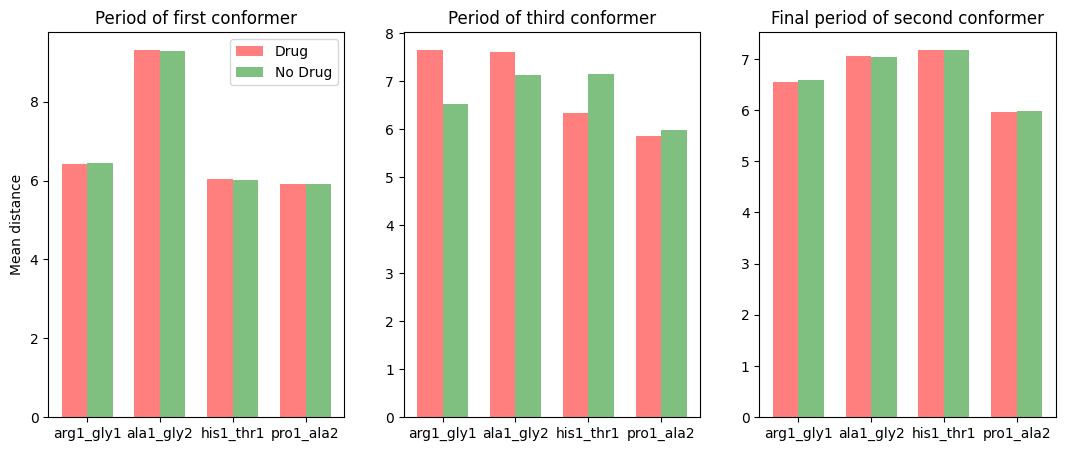

In [585]:
#Plot bar chart for mean distances at times of the three conformers

labels = ['arg1_gly1', 'ala1_gly2', 'his1_thr1', 'pro1_ala2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1,ax2,ax3)  = plt.subplots(1,3,figsize = (13,5))

# Plot bars themselves
mean_rects1 = ax1.bar(x - width / 2, drug_distance[:1200].mean(), width,label = 'Drug', color = 'red', alpha = 0.5)
mean_rects2 = ax1.bar(x + width / 2, no_drug_distance[:1200].mean(), width, label='No Drug', color = 'green', alpha = 0.5)

mean2_rects1 = ax2.bar(x - width / 2, drug_distance[1200:2000].mean(), width,label = 'Drug', color = 'red', alpha = 0.5)
mean2_rects2 = ax2.bar(x + width / 2, no_drug_distance[1200:2000].mean(), width, label='No Drug', color = 'green', alpha = 0.5)

mean3_rects1 = ax3.bar(x - width / 2, drug_distance[4000:].mean(), width,label = 'Drug', color = 'red', alpha = 0.5)
mean3_rects2 = ax3.bar(x + width / 2, no_drug_distance[4000:].mean(), width, label='No Drug', color = 'green', alpha = 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Mean distance')
ax1.set_title('Period of first conformer')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax2.set_title('Period of third conformer')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)

ax3.set_title('Final period of second conformer')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)

ax1.legend()

plt.show()